# Book Recommender System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\Ddesai\AppData\Local\Temp\ipykernel_220\3819754567.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books.shape

(271360, 8)

In [7]:
users.shape

(278858, 3)

In [8]:
ratings.shape

(1149780, 3)

In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
books.duplicated().sum()

0

In [13]:
users.duplicated().sum()

0

In [14]:
ratings.duplicated().sum()

0

# Exploratory Data Analysis

**Top 10 publishers with the most books**

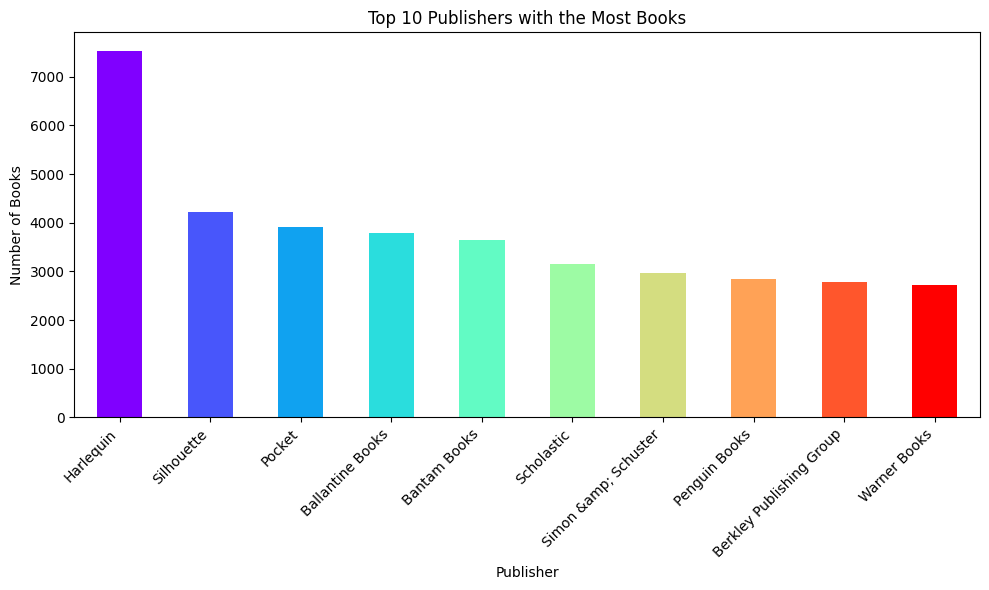

In [15]:

# Assuming 'books' is your DataFrame
top_publisher = books['Publisher'].value_counts().head(10)

# Create a bar chart with rainbow colors
plt.figure(figsize=(10, 6))
bar_colors = plt.cm.rainbow(np.linspace(0, 1, len(top_publisher)))  # Generate rainbow colors
top_publisher.plot(kind='bar', color=bar_colors)
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top 10 Authors with the most books**

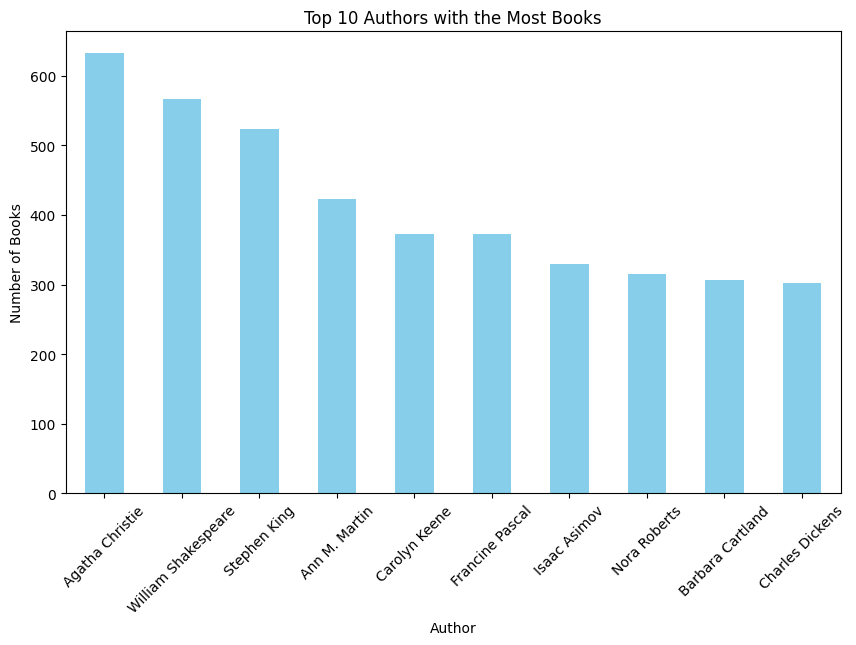

In [16]:
# top 10 Authoe with the most books.
top_authors = books['Book-Author'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar',color='skyblue')
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

**Top 10 popular books**

In [17]:
#Top 10 popular books
# Merge the books and ratings dataframes on the common ISBN column
merged_df = pd.merge(books, ratings, on='ISBN')

In [18]:
# Calculate the count of ratings for each book
book_ratings_count = merged_df['ISBN'].value_counts().head(10)

In [19]:
# Get the top 10 popular books based on ratings count
top_10_popular_books = books[books['ISBN'].isin(book_ratings_count.index)]

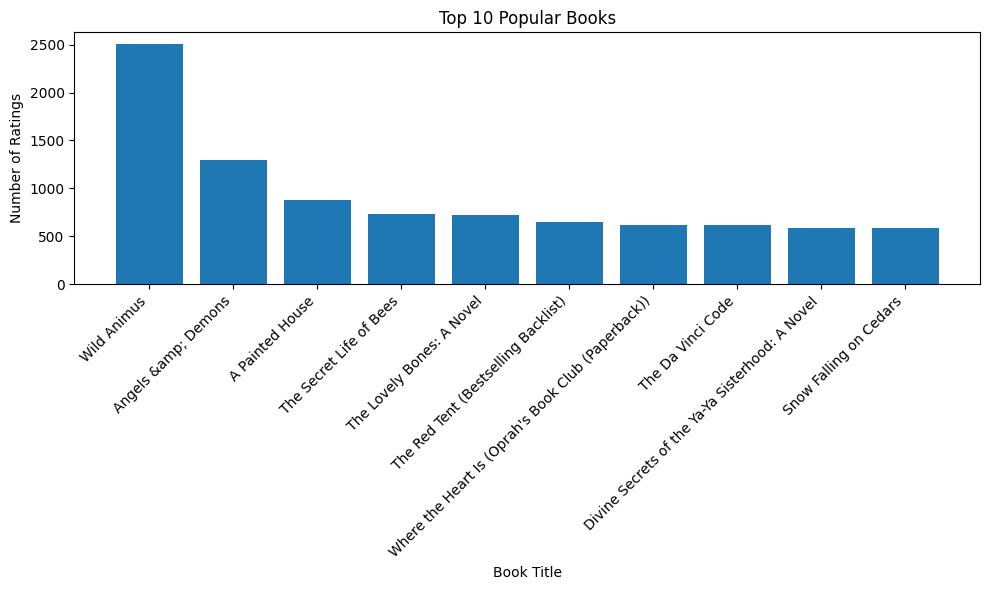

In [20]:
# Create a bar chart to visualize the top 10 popular books
plt.figure(figsize=(10, 6))
plt.bar(top_10_popular_books['Book-Title'], book_ratings_count)
plt.title('Top 10 Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Popularity Based Recommender System

In [21]:
ratings_with_name = ratings.merge(books,on = "ISBN") # Merge ratings and books on ISBN 

In [22]:
num_ratings_df = ratings_with_name.groupby("Book-Title").count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns = {"Book-Rating":"num_ratings"},inplace = True)
num_ratings_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [23]:
avg_ratings_df = ratings_with_name.groupby("Book-Title").mean()['Book-Rating'].reset_index()
avg_ratings_df.rename(columns = {"Book-Rating":"avg_rating"},inplace = True)
avg_ratings_df

C:\Users\Ddesai\AppData\Local\Temp\ipykernel_220\3131496709.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_ratings_df = ratings_with_name.groupby("Book-Title").mean()['Book-Rating'].reset_index()


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [24]:
popular_df = num_ratings_df.merge(avg_ratings_df, on="Book-Title")
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [25]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending = False).head(50)

In [26]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [42]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# Colaborative Recommender System

In [28]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [29]:
X = ratings_with_name.groupby("User-ID").count()['Book-Rating'] > 200
educated_users = X[X].index

In [30]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(educated_users)]

In [31]:
y = filtered_rating.groupby("Book-Title").count()['Book-Rating'] >= 50
famous_book = y[y].index

In [32]:
final_ratings = filtered_rating[filtered_rating["Book-Title"].isin(famous_book)]

In [33]:
pt = final_ratings.pivot_table(index="Book-Title",columns="User-ID", values = "Book-Rating")

In [34]:
pt.fillna(0,inplace = True)

In [35]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity_score = cosine_similarity(pt)

In [38]:
similarity_score.shape

(706, 706)

In [43]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = (books[books['Book-Title'] == pt.index[i[0]]])
        item.extend(list(temp_df.drop_duplicates("Book-Title")['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")['Image-URL-M'].values))
        
        data.append(item)
    return data

In [44]:
recommend("Zoya")

[['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg'],
 ['Exclusive',
  'Sandra Brown',
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg'],
 ['Five Days in Paris',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440222842.01.MZZZZZZZ.jpg']]

In [41]:
recommend("Message in a Bottle")

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [42]:
recommend("The Notebook")

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven


In [43]:
recommend("The Da Vinci Code")

Angels &amp; Demons
Touching Evil
Saving Faith
The Sweet Potato Queens' Book of Love
Middlesex: A Novel


In [44]:
recommend("Year of Wonders")

The Eight
A Heartbreaking Work of Staggering Genius
Bridget Jones: The Edge of Reason
Drowning Ruth (Oprah's Book Club)
Midwives: A Novel


In [45]:
recommend("1984")

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [48]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [46]:
import pickle
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_score,open('similarity_scores.pkl','wb'))